In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

# Data

In [2]:
# #          16     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16     
# day1   = [44.7, 44.0, 43.5, 39.7, 35.2, 34.7, 34.3, 32.5, 28.2, 26.2, 23.8, 23.2, 20.3, 18.7, 17.5, 16.8, 13.7]
# day2   = [57.4, 57.3, 58.2, 59.2, 58.7, 60.2, 60.8, 62.0, 61.5, 63.3, 65.8, 67.3, 69.7, 70.7, 73.0, 70.2, 72.2]
# day3   = [27.3, 23.5, 22.0, 19.3, 19.2, 19.3, 18.7, 18.8, 16.2, 14.3, 13.3, 12.8, 13.3, 12.3, 10.2, 07.3, 06.5]
# day_avg = np.mean([day1, day2, day3], axis = 0)
# day_wv_full = day_avg * 0.02
# day_wv = np.mean([day_wv_full[:9], day_wv_full[8:]], axis = 0)

# #          16     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16   
# eve1   = [61.2, 63.3, 63.3, 68.2, 67.7, 69.3, 70.3, 69.8, 69.0, 71.3, 71.3, 70.5, 71.2, 71.2, 70.5, 72.5, 75.7]
# eve2   = [26.0, 26.0, 28.2, 29.2, 31.5, 32.0, 31.3, 31.7, 33.0, 35.8, 36.5, 37.3, 38.8, 41.0, 42.7, 43.7, 44.0]
# eve3   = [66.8, 66.5, 66.0, 64.3, 62.2, 61.0, 61.3, 59.7, 58.2, 55.7, 53.7, 54.7, 55.0, 58.2, 58.5, 57.0, 56.0]
# eve_avg = np.mean([eve1, eve2, eve3], axis = 0)
# eve_wv_full = eve_avg * 0.02
# eve_wv = np.mean([eve_wv_full[:9], eve_wv_full[8:]], axis = 0)

Measurements Explanation:
For each orientation step, they measured the "location" of the next fringe i.e: 
     o 
1:   | | | |
at the next step, I believe they measured the "location" of the next fringe:
     o x
2:   | | | |
This is where my knowledge breaks down. Either they expected the distances between fringes to increase and would have measaured:
     o  x
2':  |  |  |  |
in which they would have expected the distances between fringes to oscilate with time, or they expected that the entire fringe pattern would have shifted:
     o  x 
2'': |:|:|:|:
and were expecting to see that the fringes would have shifted farther than normal. Either way, the quantity of interest was the difference in the "location" of the fringes.

In [3]:
orientation = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
angle = orientation * np.pi/8

#        16     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16     
day1 = [44.7, 44.0, 43.5, 39.7, 35.2, 34.7, 34.3, 32.5, 28.2, 26.2, 23.8, 23.2, 20.3, 18.7, 17.5, 16.8, 13.7]
day2 = [57.4, 57.3, 58.2, 59.2, 58.7, 60.2, 60.8, 62.0, 61.5, 63.3, 65.8, 67.3, 69.7, 70.7, 73.0, 70.2, 72.2]
day3 = [27.3, 23.5, 22.0, 19.3, 19.2, 19.3, 18.7, 18.8, 16.2, 14.3, 13.3, 12.8, 13.3, 12.3, 10.2, 07.3, 06.5]

# Splitting each day's data into two halves since the experiment is supposed to be symmetric
# Putting it all into a single array
day_list = np.array([day1[:9], day1[8:], day2[:9], day2[8:], day3[:9], day3[8:]])

# Finding the difference between each measurement, but doing so by taking d_i - d_i+1
day_deltas_incomplete = np.diff(-day_list)
# Adding in a zero point as they have done
day_deltas = np.insert(day_deltas_incomplete, 0, 0, axis = 1)

# Shifting each data set to the mean of that data set so that it's centered at zero, like they have done
day_diffs = np.empty(np.shape(day_deltas))
for i, d_list in enumerate(day_deltas):
    day_diffs[i] = d_list - np.mean(d_list)

#        16     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16   
eve1 = [61.2, 63.3, 63.3, 68.2, 67.7, 69.3, 70.3, 69.8, 69.0, 71.3, 71.3, 70.5, 71.2, 71.2, 70.5, 72.5, 75.7]
eve2 = [26.0, 26.0, 28.2, 29.2, 31.5, 32.0, 31.3, 31.7, 33.0, 35.8, 36.5, 37.3, 38.8, 41.0, 42.7, 43.7, 44.0]
eve3 = [66.8, 66.5, 66.0, 64.3, 62.2, 61.0, 61.3, 59.7, 58.2, 55.7, 53.7, 54.7, 55.0, 58.2, 58.5, 57.0, 56.0]

# Splitting each day's data into two halves since the experiment is supposed to be symmetric
# Putting it all into a single array
eve_list = np.array([eve1[:9], eve1[8:], eve2[:9], eve2[8:], eve3[:9], eve3[8:]])

# Finding the difference between each measurement, but doing so by taking d_i - d_i++
eve_deltas_incomplete = np.diff(-eve_list)
# Adding in a zero point as they have done
eve_deltas = np.insert(eve_deltas_incomplete, 0, 0, axis = 1)

# Shifting each data set to the mean of that data set so that it's centered at zero, like they have done
eve_diffs = np.empty(np.shape(eve_deltas))
for i, d_list in enumerate(eve_deltas):
    eve_diffs[i] = d_list - np.mean(d_list)

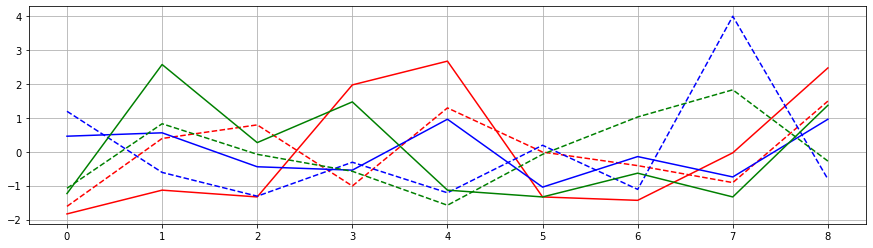

In [4]:
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(orientation, day_diffs[0], color = 'red')
ax.plot(orientation, day_diffs[1], color = 'red', ls = "--")
ax.plot(orientation, day_diffs[2], color = 'blue')
ax.plot(orientation, day_diffs[3], color = 'blue', ls = '--')
ax.plot(orientation, day_diffs[4], color = 'green')
ax.plot(orientation, day_diffs[5], color = 'green', ls = '--')
ax.grid()

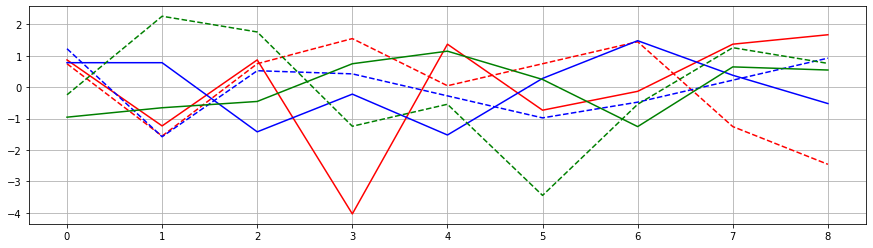

In [5]:
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(orientation, eve_diffs[0], color = 'red')
ax.plot(orientation, eve_diffs[1], color = 'red', ls = "--")
ax.plot(orientation, eve_diffs[2], color = 'blue')
ax.plot(orientation, eve_diffs[3], color = 'blue', ls = '--')
ax.plot(orientation, eve_diffs[4], color = 'green')
ax.plot(orientation, eve_diffs[5], color = 'green', ls = '--')
ax.grid()

In [6]:
# Averaging Differences:
day_mean = np.mean(day_diffs, axis = 0)
day_err  = np.var(day_diffs, axis = 0, ddof = 1)
eve_mean = np.mean(eve_diffs, axis = 0)
eve_err  = np.var(eve_diffs, axis = 0, ddof = 1)

day_mean_wv = day_mean*0.02
day_err_wv = day_err*0.02
eve_mean_wv = eve_mean*0.02
eve_err_wv = eve_err * 0.02

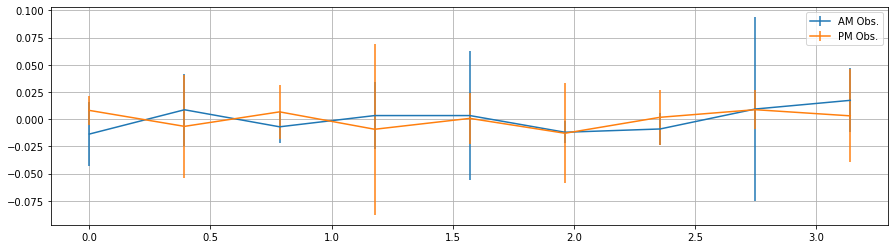

In [7]:
fig, ax = plt.subplots(figsize = (15,4))
ax.errorbar(angle, day_mean_wv, yerr = day_err_wv, label = 'AM Obs.')
# ax.plot(angle, day_mean, color = 'red', label = 'AM Obs.')
ax.errorbar(angle, eve_mean_wv, yerr = eve_err_wv, label = 'PM Obs.')
# ax.plot(angle, eve_mean*0.02, color = 'blue', label = 'PM Obs.')
# ax.set_ylim(-0.05, 0.05)
# ax.set_xlim(0,np.pi)
ax.grid()
ax.legend()

# Modelling

Three models to test:
- Null Model: Displacement is orientation-independent
- Michelson-Morley Model: Displacement oscillates between $\pm 0.2$ from 0 to $\pi$
- Free Model: Displacement amplitude is a free parameter, and our offset is not necessarily aligned with the velocity of the Earth

In [8]:
def null_model(theta, params):
    return theta*0

def mm_model(theta, params):
    disp = 0.2*np.sin(2*theta)
    return disp

def free_model(theta, params):
    amp = params[0]
    off = params[1]
    disp = amp*np.sin(2*(theta) + off)
    return disp

In [9]:
def chi2(params, data, errors, model):
    chi_2 = 0
    for i, d in enumerate(data):
        theta = angle[i]
        err = errors[i]
        chi_2 += (d - model(theta, params))**2/err**2
        
    return chi_2

In [10]:
fit_null_day = sp.minimize(chi2, (0,0), args = (day_mean_wv, day_err_wv, null_model))
fit_mm_day = sp.minimize(chi2, (0,0), args = (day_mean_wv, day_err_wv, mm_model))
fit_free_day = sp.minimize(chi2, (0, 0), args = (day_mean_wv, day_err_wv, free_model))

In [11]:
print(fit_null_day)
print(fit_mm_day)
print(fit_free_day)

      fun: 2.691797765447714
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
      fun: 573.3952487945505
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
      fun: 1.5243994139054944
 hess_inv: array([[4.87567004e-05, 2.79232183e-03],
       [2.79232183e-03, 6.98452002e-01]])
      jac: array([ 3.42726707e-07, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([0.00937379, 1.14872489])


In [12]:
theta_vals = np.linspace(0, np.pi, 100)
null_vals = null_model(theta_vals,(0,0))
mm_vals = mm_model(theta_vals,(0,0))
free_vals = free_model(theta_vals, fit_free_day.x)

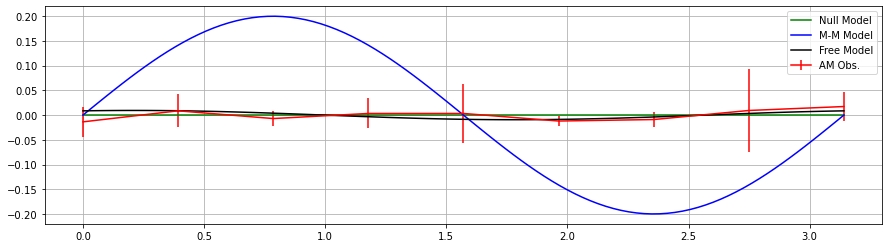

In [14]:
fig, ax = plt.subplots(figsize = (15,4))
ax.errorbar(angle, day_mean*0.02, yerr = day_err*0.02, color = 'red', label = 'AM Obs.')
# ax.errorbar(angle, eve_mean*0.02, yerr = wv_err, color = 'blue', label = 'PM Obs.')
ax.plot(theta_vals, null_vals*0.02, color = 'green', label = 'Null Model')
ax.plot(theta_vals, mm_vals, color = 'blue', label = 'M-M Model')
ax.plot(theta_vals, free_vals, color = 'black', label = 'Free Model')
# ax.set_ylim(-0.05, 0.05)
# ax.set_xlim(0,np.pi)
ax.grid()
ax.legend()